In [ ]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler

import numpy as np
import pandas as pd

from merge_h5_files import merge_preserve_time
import os
import glob

# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


# merge dataset

In [7]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/sensor_2019-04-01T180047Z.h5','r')
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage22/sensor_2019-04-07T033627Z.h5','r')
print(list(f1.keys()))
# 继续进入下一层
data_group = f1['Acquisition']['Raw[0]']['RawData']
print(data_group)
# print(list(data_group.keys()))
# 继续进入下一层
# data_group2 = data_group['Raw[0]']
# print(list(data_group2.keys()))
# 继续进入下一层
# RawData = data_group2['RawData']
# print(RawData)
# RawDataTime = data_group2['RawDataTime']
# print(RawDataTime)

['Acquisition']
<HDF5 dataset "RawData": shape (6100, 30), type "<i4">


In [ ]:

folder  = r"C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage22"
pattern = "sensor_*.h5"  # 或者 "*.h5"
out_h5  = os.path.join(folder, "merged_stage22_preserve_time.h5")

files = sorted(glob.glob(os.path.join(folder, pattern)))
assert files, f"在 {folder} 未找到匹配 {pattern} 的文件。"

# Merge HFTS2 h5 files while preserving time information
# （depth, time）no need to transpose
merge_preserve_time(files, out_h5,
                    expected_depth=6100,
                    expected_T_per_file=30,
                    sort_by_time=True,
                    compression=None)  # 需要压缩可设 'gzip', compression_opts=4

合并完成：C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage22\merged_stage22_preserve_time.h5
  /Acquisition/Raw[0]/RawData 形状: (6100, 2400)
  /Acquisition/Raw[0]/RawDataTime 形状: (2400,)
  还写入了 /Acquisition/FileNames 与 /Acquisition/FileOffsets（便于追溯映射）


# axes calibration

In [1]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


In [2]:
# Read h5 files
# f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 3 (refrac)/Neubrex_DSS_strain/Zgabay A14H - refrac - strain change.h5','r')
merged_data = h5py.File('C:/Users/fengxiang.mao/Desktop/HFTS2_dataset/stage6/merged_stage6_preserve_time.h5','r')
print(list(merged_data.keys()))

['Acquisition']


In [3]:
# Assign variables
dstrain = (merged_data['Acquisition']['Raw[0]']['RawData'])
# depth = (f1['depth'])
time_relative = (merged_data['Acquisition']['Raw[0]']['RawDataTime'])

# use panda package
# print(pd.DataFrame(dstrain))
print(pd.DataFrame(dstrain))
# print(pd.DataFrame(date_plot))

        0       1       2       3       4       5       6       7       8     \
0      -2953   -2580   -8633   13133  -17471  -50952   -5160   -9372  -27356   
1     -38452  -83629   92776   28933  -36660   19688  -23558   -3773    4614   
2     170796   98109  -17016   27394  108543   65053   31672   71126   44777   
3     414549  141402  -39769  176868  363481  222100  126043  217992  128663   
4     606105  241944 -154941  -88866  342204  257189  224281  373070  325640   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6095 -186136  -32691    8720    1937   88566  184335    6386 -185189 -300235   
6096 -217258   22032  188394  -17187  -58971  108712  -87471 -257052   31129   
6097   26447 -148212  104515   88457   -6225   56758   76768    9467 -106000   
6098 -303778 -158940  386575  224340 -111798  -83379  -88561  147851  254396   
6099   55538   95133  -51723 -180810 -334355  117284  -23709 -393634 -101832   

        9     ...    2990    2991    29

In [4]:
# convert the strain data to numpy array
dstrain = np.array(dstrain)
print(dstrain.shape)

# date_plot = np.array(date_plot)

(6100, 3000)


In [18]:
t_intrvl = 10  # time interval in seconds
t_axis = t_intrvl * np.arange(dstrain.shape[-1])          # array([1, 146, 291, ...])
t_axis = t_axis.tolist() 
print(t_axis)
print(type(t_axis))
start_time = datetime.datetime(2019,4,1,18,00,47)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 

In [8]:


# Parameters
sp_resolution = 1.0209523439407349    # Spatial resolution, m
time_resolution = 10     # Time resolution, s
optical_dis_top = 327.20279999999997  # Optical distance to top, m
optical_dis_end = 6198.7121136000005  # Optical distance to bottom, m
physical_dis_top = -4.440892098500626E-15      # Physical distance to top, m
physical_dis_end = 5840.0656312500005  # Physical distance to bottom, m
kelly_bushing = 7.9248   # Kelly bushing height, m


# Convert meters to feet
def meters_to_feet(meters):
    return meters * 3.28084

sp_resolution_ft = meters_to_feet(sp_resolution)
optical_dis_top_ft = meters_to_feet(optical_dis_top)
optical_dis_end_ft = meters_to_feet(optical_dis_end)
physical_dis_top_ft = meters_to_feet(physical_dis_top)
physical_dis_end_ft = meters_to_feet(physical_dis_end)
kelly_bushing_ft = meters_to_feet(kelly_bushing)


# Compute MD (measured depth) for a range of channel counts in a vectorized way
min_channels = 0
max_channels = 6099
channels = np.arange(min_channels, max_channels + 1)
fiber_MD = channels * sp_resolution_ft 
MD = (fiber_MD - optical_dis_top_ft) * (physical_dis_end_ft - physical_dis_top_ft) / (optical_dis_end_ft - optical_dis_top_ft)  + kelly_bushing_ft

print(MD)
print(MD.shape)

[-1041.75112088 -1038.4194776  -1035.08783432 ... 19271.27796929
 19274.60961257 19277.94125585]
(6100,)


In [19]:
data = dstrain

# creating a Data2D class instance

DASdata = Data2D_XT.Data2D() # initiate instance
DASdata.data = data   # DAS data in 2D array, the first axis is distance and second axis is time

# DASdata.taxis = pd.date_range(start = date_plot[0],end = date_plot[-1],periods = len(date_plot))
DASdata.taxis = t_axis

DASdata.daxis = MD  # 1D array for distance grid, unit in ft
DASdata.start_time = start_time

DASdata.taxis[-1]


29990

# Waterfall plot

In [20]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'axes.labelsize': 20,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 20,        # X轴刻度文字
      'ytick.labelsize': 20,        # Y轴刻度文字
      'legend.fontsize': 20,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 2.0,
      } 
# lack of font size
plt.rcParams.update(rc)

<Figure size 14400x7200 with 0 Axes>

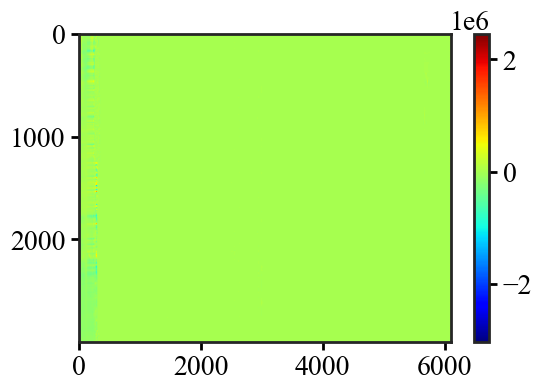

In [ ]:
# waterfall plot
dstrain = np.array(dstrain)
strain_T = dstrain.T

plt.figure(figsize=(6,4))
plt.imshow(strain_T,aspect='auto',cmap='seismic')
plt.colorbar()
plt.clim()
# plt.savefig('waterfall_cor_v1.svg')
plt.show()

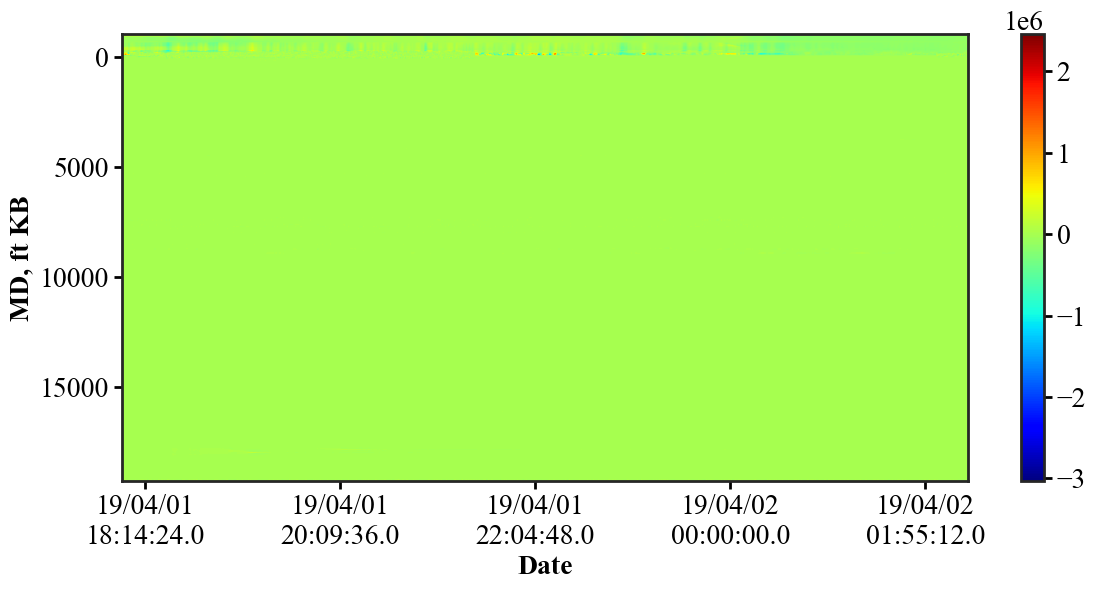

In [22]:
# cx = np.array([-1,1])
# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second',use_timestamp=True,cmap=plt.get_cmap('jet'),xtickN=5)
ax = plt.gca()
plt.clim()
plt.colorbar()
plt.ylabel("MD, ft KB")
plt.xlabel('Date')
plt.tight_layout()
plt.savefig('waterfall_ori.png')
